# Install packages

In [1]:
%%capture
!pip install torch==1.6.0+cu101 torchvision==0.7.0+cu101 -f https://download.pytorch.org/whl/torch_stable.html

In [2]:
%%capture
!pip install -U matplotlib

In [3]:
%%capture
!wget -qO- https://raw.githubusercontent.com/matteo-ronchetti/torch-radon/master/auto_install.py  | python -
!wget https://github.com/matteo-ronchetti/torch-radon/raw/master/examples/phantom.npy

**IMPORTANT: after the instalation of all packages, go to "Runtime > Restart runtime"**

# Cloning the repository

## Generating a new SSH key 

There is a need to add the code generated in the last cell in the github account to work (settings -> SSH and GPG Keys -> New SSH key)

In [4]:
!ssh-keygen -t rsa -b 4096

Generating public/private rsa key pair.
Enter file in which to save the key (/root/.ssh/id_rsa): 
Created directory '/root/.ssh'.
Enter passphrase (empty for no passphrase): 
Enter same passphrase again: 
Your identification has been saved in /root/.ssh/id_rsa.
Your public key has been saved in /root/.ssh/id_rsa.pub.
The key fingerprint is:
SHA256:0LTZAVWjo5z/g0eQiumNg+PWuiWVUT3cfgs7AN8ioS0 root@f98106c23ca7
The key's randomart image is:
+---[RSA 4096]----+
|        +=ooo    |
|       +o++o..   |
|      oo+++=     |
|      E=oo*.+ .  |
|      o+So + + . |
|     .o ..  + .  |
|    .+.o  .o .   |
|    +o= . ..o    |
|   o++ .   ...   |
+----[SHA256]-----+


In [5]:
!ssh-keyscan -t rsa github.com >> ~/.ssh/known_hosts

# github.com:22 SSH-2.0-babeld-d975cc25


In [6]:
!cat /root/.ssh/id_rsa.pub

ssh-rsa AAAAB3NzaC1yc2EAAAADAQABAAACAQCbhnkSEbsqN+jFWfkwh2/DcGSBcq5rb1KCuusvxlxN/S/NLsFhr7/jcjgEouOk0T3jewTDQke/7mxB6PCV7qHr7+yX8CBOLcVBEJeWqiDu5HTDXrxR0MHBD/46QW8GYufM1jmxBEsKI+IoFuqacjFX/SjtkP8C7yo+dQiDxzu0M8y4v8Nny+EK0RRNg4b4ZaVMzg1cU4pGQPZyC7y8mTJIzBMw/Sl3f7x51s5/GpdK37iYgPfQjWN2WCEkOCYemhgXBJbSS35cYGU5HuM6fnrdLuVP0YQ5yBerY9hrGqsbFtKPvZRXuXEcyEnlEmXWWs+165M+F7m8iYQApTyUmklDC+2bJ66/ZJHeLe/Jb8YBK29AVDChipAVV3+dmvanSxxS4MYah8wc2x2NA29BduVGt+IEhDJs54tVhSYFNPJVhIEW71TQ2+2tNkVRWq15lT0Aom6b02Z7sWPzM8i5BcEZbAEvrkuS+vVuraQ2U8gUyPtVWmfGkiFegdcy0KCauX6ywrGVXLXIiXi1WdP/Og4oK0mjy2ONxa5NgNiQQP5AeaJ6DDF76KN6Fz85mjAWhwlo1FnA/LQF9fg9QxEkAE+jEUh5jpKw8dJ0V5RUYaX1u7kBFywPFEjEsV9Rp+40wNjdWRQysMkUKkYdLqa9Qhjxk3XGqdi8AMRyfP7LkyAYBQ== root@f98106c23ca7


## Cloning and entering the repository folder

In [7]:
!git clone git@github.com:robert-abc/HTC2022-First.git --branch main


Cloning into 'HTC2022-First'...
remote: Enumerating objects: 98, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 98 (delta 4), reused 1 (delta 1), pack-reused 93
Receiving objects: 100% (98/98), 1.58 MiB | 3.51 MiB/s, done.
Resolving deltas: 100% (20/20), done.


In [3]:
%cd HTC2022-First

/content/HTC2022-First


# Generating results

In [9]:
!python main.py 'example/input' 'example/output' 7

4 images were found.


# Results visualization
This is an example from the category 7.

In [1]:
import matplotlib.pyplot as plt
from skimage.io import imread
from os.path import join
import os
import re

In [4]:
gt_name = os.listdir('example/groundTruth')
out_name = os.listdir('example/output')

r=re.compile(".*png")

gt_name = list(filter(r.match, gt_name))
out_name = list(filter(r.match, out_name))

gt_name.sort()
out_name.sort()

In [5]:
img_list=[]

for i in range(len(gt_name)):
  ground = imread(join('example/groundTruth',gt_name[i]))
  output = imread(join('example/output',out_name[i]))

  img_list.append([ground, output])

In [6]:
def multiplot(imgs, titles=['Ground Truth', 'Output']):
  plt.figure(figsize=[12,4])
  for i in range(len(imgs)):
    plt.subplot(1,2,i+1)
    plt.imshow(imgs[i],cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.title(titles[i])

plt.show();

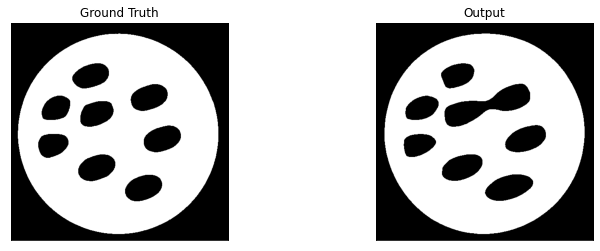

In [7]:
# ta
multiplot(img_list[0])

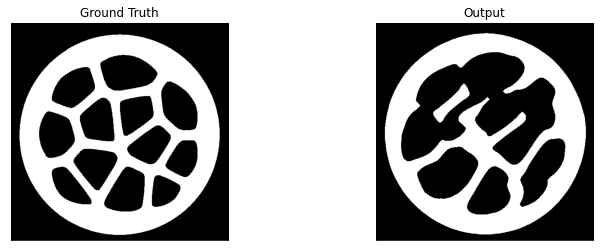

In [8]:
# tb
multiplot(img_list[1])

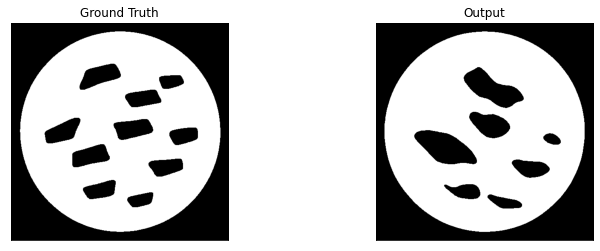

In [9]:
# tc
multiplot(img_list[2])

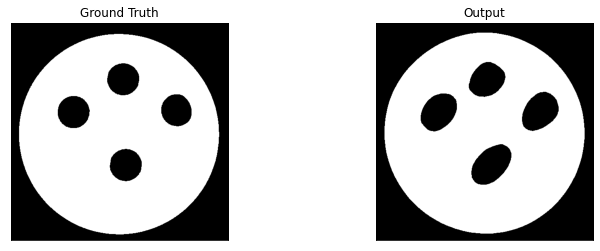

In [16]:
# td
multiplot(img_list[3])